In [15]:
import util
import bemkl_binary
import pandas as pd
from util import *
from bemkl_binary import *

from matplotlib import pyplot as plt
%matplotlib inline

In [9]:
DATA_DIR = "../data"

def get_pima_data():
    data_dir = "%s/UCI/pima-indians-diabetes" %DATA_DIR
    files = [f for f in os.listdir(data_dir) if f.startswith("pima-indians-diabetes.data")]
    dfs = [pd.read_csv("%s/%s" %(data_dir,f), header=None) for f in files]
    data = np.concatenate(dfs)
    
    msk = data[:,-1] > 0
    data[msk, -1] = 1.
    data[~msk, -1] = -1.

    X = data[:,:-1]
    y = data[:, -1]
    
    return X, y

In [10]:
X_pima, y_pima = get_pima_data()


N = 537 

X_pima = util.preprocess_feats(X_pima)
K_pima = util.get_kernels(X_pima, poly=True)
K_pima = util.preprocess_kernel(K_pima)
K, K_test = K_pima[:,:N,:N],K_pima[:,N:,:N]
y, y_test = y_pima[:N], y_pima[N:]

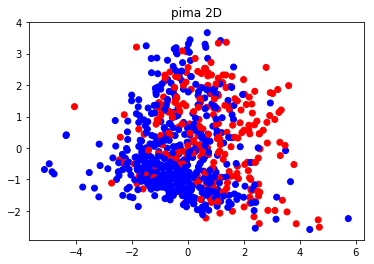

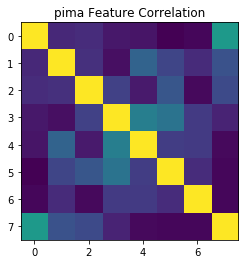

In [28]:
reload(plot)

plot.plot_data(X_pima,y_pima, 'pima')


In [11]:
bemkl = BEMKL()

#### Training 

In [12]:
bemkl.bemkl_binary(K, y)

#### Testing

In [13]:
pred, prob = bemkl.predict(K_test)
print('Accuracy:')
print('%.2f' %((pred==y_test).sum()*1./y_test.shape[0]*100), '%')

Accuracy:
('83.98', '%')
